# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline

passengers = pd.read_csv('example_retail_sales.csv')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(passengers['ds'])
df['y'] = passengers['y']
df["y"] =  np.log(df["y"])

In [49]:
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


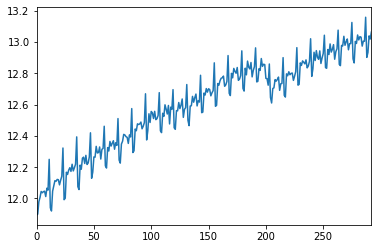

In [50]:
df["y"].plot()

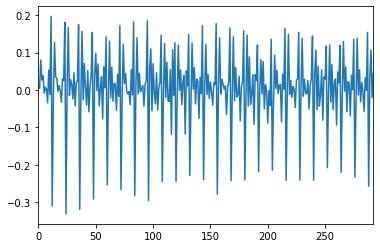

In [51]:
df["y"].diff().plot()

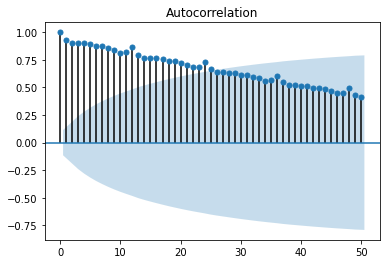

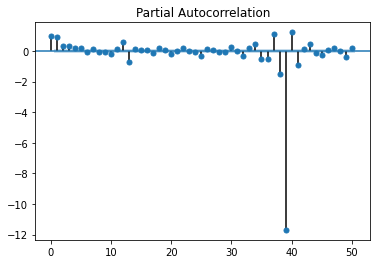

In [52]:
# Realizamos las graficas de Correlaciones
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Modelo MA orden 1
plot_acf(df.y, lags=50)
plot_pacf(df.y, lags=50);

In [65]:
from statsmodels.tsa.arima_model import ARIMA

df["y"]=df["y"].astype(float)

type(df["y"])

pandas.core.series.Series

In [66]:
# fit model
model = ARIMA(df, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary());

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

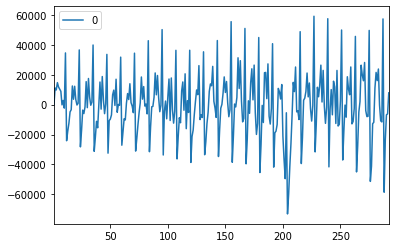

In [20]:
import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

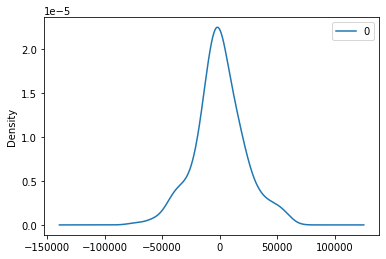

0
count    292.000000
mean     119.083409
std    21548.947229
min   -73095.012249
25%   -11354.574246
50%     -486.460495
75%    11899.841368
max    59111.631125


In [21]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [22]:
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=366746.608381, expected=343937.000000
predicted=392878.754492, expected=372923.000000
predicted=385100.812221, expected=368923.000000
predicted=389354.464368, expected=397969.000000
predicted=374397.015613, expected=378490.000000
predicted=378110.388656, expected=383686.000000
predicted=365895.078598, expected=382852.000000
predicted=371413.263026, expected=350560.000000
predicted=388301.653166, expected=349884.000000
predicted=389268.166722, expected=335571.000000
predicted=391907.517749, expected=384286.000000
predicted=385167.502102, expected=310269.000000
predicted=361831.809874, expected=299488.000000
predicted=366885.676651, expected=328568.000000
predicted=352068.172628, expected=329866.000000
predicted=349393.292930, expected=347768.000000
predicted=329771.826673, expected=344439.000000
predicted=337701.677033, expected=348106.000000
predicted=330173.350087, expected=353473.000000
predicted=332760.218222, expected=324708.000000
predicted=341859.000320, expected=338630

# Modelado con Propthet

In [67]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [68]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [69]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
360,2021-12-31
361,2022-01-31
362,2022-02-28
363,2022-03-31
364,2022-04-30


In [70]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2021-12-31,13.119423,12.748307,13.505686
361,2022-01-31,13.151778,12.777257,13.554067
362,2022-02-28,13.239790,12.863891,13.652119
363,2022-03-31,13.230343,12.840798,13.644714
364,2022-04-30,13.282491,12.891597,13.695075


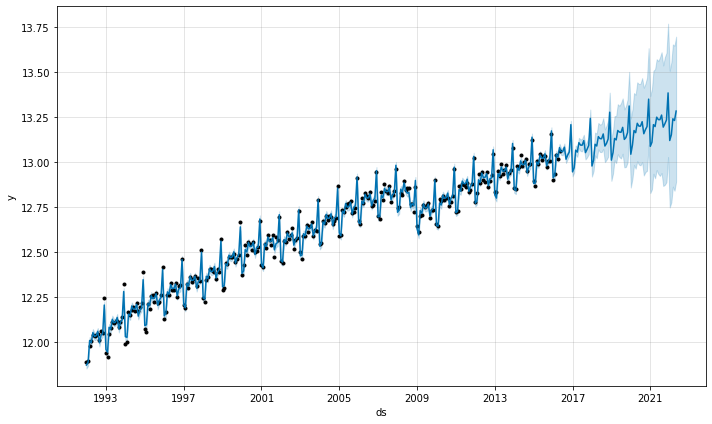

In [71]:
fig1 = m.plot(forecast)

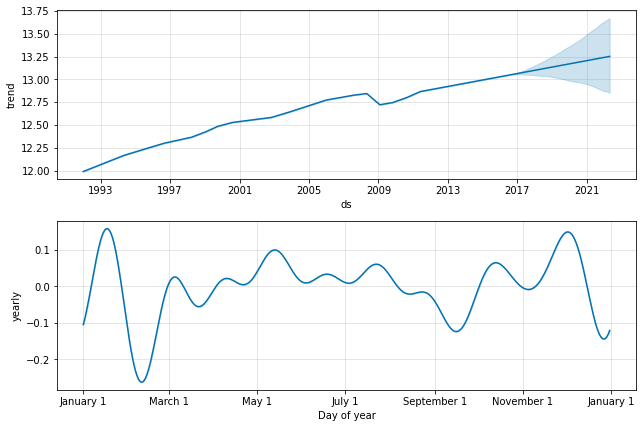

In [72]:
m.plot_components(forecast);

In [73]:
from fbprophet import Prophet

prediction_size = 180
train_df=df[:-prediction_size]

In [81]:
m=Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size, freq="D")
forecast = m.predict(future)
forecast.head();

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


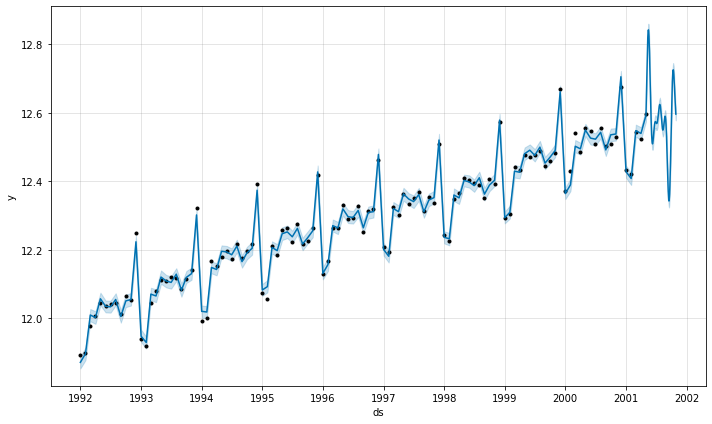

In [82]:
fig2 = m.plot(forecast)

In [83]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507
